# Problem: **Calssification** (Total score 50)

# **`Import the 4 models of the first assignment and their results:`**

1)	Read the data from your individual variant into Python notebook

In [ ]:
# Import some libraries for Data preprocessing
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wisc_bc_data.csv to wisc_bc_data.csv


In [ ]:
df = pd.read_csv('wisc_bc_data.csv')

2) Output the main information (number of variables, number of instances).

In [ ]:
# Number of variables
Number_of_Variables = df.shape[0]

# Number of instances
Number_of_Instances = df.shape[1]

print('Number of variables:', Number_of_Variables)
print('Number of instances:', Number_of_Instances)

Number of variables: 569
Number of instances: 32


In [ ]:
# info() function can give us also the main information of the data that we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

*Our Data has 569 Observations and 32 variables. It seems that the data probably don't contain missing values.*

3) Output some first rows of the dataset.


In [ ]:
# head() function to output the first rows
df.head(10) # The number 10 gives us the first 10 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


4) Make explanatory data analyses for each variable (mean, std, etc.).

In [ ]:
# Describe() function gives us the main statistical information about the data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


*The target variable **diagnosis** contain two classes. It can be considerer as a binary classification.*

In [ ]:
# Output the variance of each variable
variance = df.var()
print(variance)

id                         1.563015e+16
radius_mean                1.241892e+01
texture_mean               1.849891e+01
perimeter_mean             5.904405e+02
area_mean                  1.238436e+05
smoothness_mean            1.977997e-04
compactness_mean           2.789187e-03
concavity_mean             6.355248e-03
concave points_mean        1.505661e-03
symmetry_mean              7.515428e-04
fractal_dimension_mean     4.984872e-05
radius_se                  7.690235e-02
texture_se                 3.043159e-01
perimeter_se               4.087896e+00
area_se                    2.069432e+03
smoothness_se              9.015114e-06
compactness_se             3.207029e-04
concavity_se               9.111982e-04
concave points_se          3.807242e-05
symmetry_se                6.833290e-05
fractal_dimension_se       7.001692e-06
radius_worst               2.336022e+01
texture_worst              3.777648e+01
perimeter_worst            1.129131e+03
area_worst                 3.241674e+05


<ipython-input-8-58fbbb3c5e16>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = df.var()


5) Look at independent and dependent variables. Divide the dataset accordingly into matrices X and Y. Output the shapes of these matrices.

In [ ]:
# The dependent variable in our dataset is diagnosis
Y = df[['diagnosis']]

# Output the shape of the dependent variable
Y.shape

(569, 1)

In [ ]:
# The independent variavles are all the remaining columns
X = df.drop(['diagnosis'], axis= "columns")

# Output the shape of the independent variables
X.shape

(569, 31)

*The target variable, **dignosis** has a dimension of (569, 1), meaning there are 569 observations with one possible vaules, either 'M'(malignant) or 'B' (benign). The independent variables, with a dimension of (569, 31), are the features that might help predict the target variable. It'is reasonable to assume that this is a biinary classification problem.*

6) Look at data types of the variables. Are there any categorical variable you need to encode? Execute necessary transformations. Drop some columns if necessary, when recommended in your individual variant.

In [ ]:
# Encode the target variable using label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y_encoded1 = encoder.fit_transform(Y)

# Convert the encoded array back to a Dataframe
Y_encoded = pd.DataFrame(Y_encoded1, index = Y.index, columns = Y.columns )

Y_encoded.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,diagnosis
0,1
1,1
2,1
3,1
4,1


*In this case, the target variable **diagnosis** has two categories. **M** will take label **1** and **B** will take label **0**.*

In [ ]:
# Drop the id column
X = X.drop('id', axis= "columns")
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


7) Are there any Nan values? Try different filling of them (mean, median).

In [ ]:
X.isnull().sum()[np.where(X.isnull().sum() != 0)[0]]

Series([], dtype: int64)

*There are no Nan values in our dataset.*

In [ ]:
# Concat the data to use it in Task 2
df_preprocessed = pd.concat([X, Y_encoded], axis=1)

8) Check the dependences between each of the independent variable and the target variable and among the independent variables.  Output correlation table and corresponding headmap results.

In [ ]:
# Correlation table betweem independent variable and dependent variable
data = X.copy()
data['diagnosis'] = Y_encoded

correlation_table = data.corr()['diagnosis']
correlation_table

radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
concave points_worst       0

<function matplotlib.pyplot.show(close=None, block=None)>

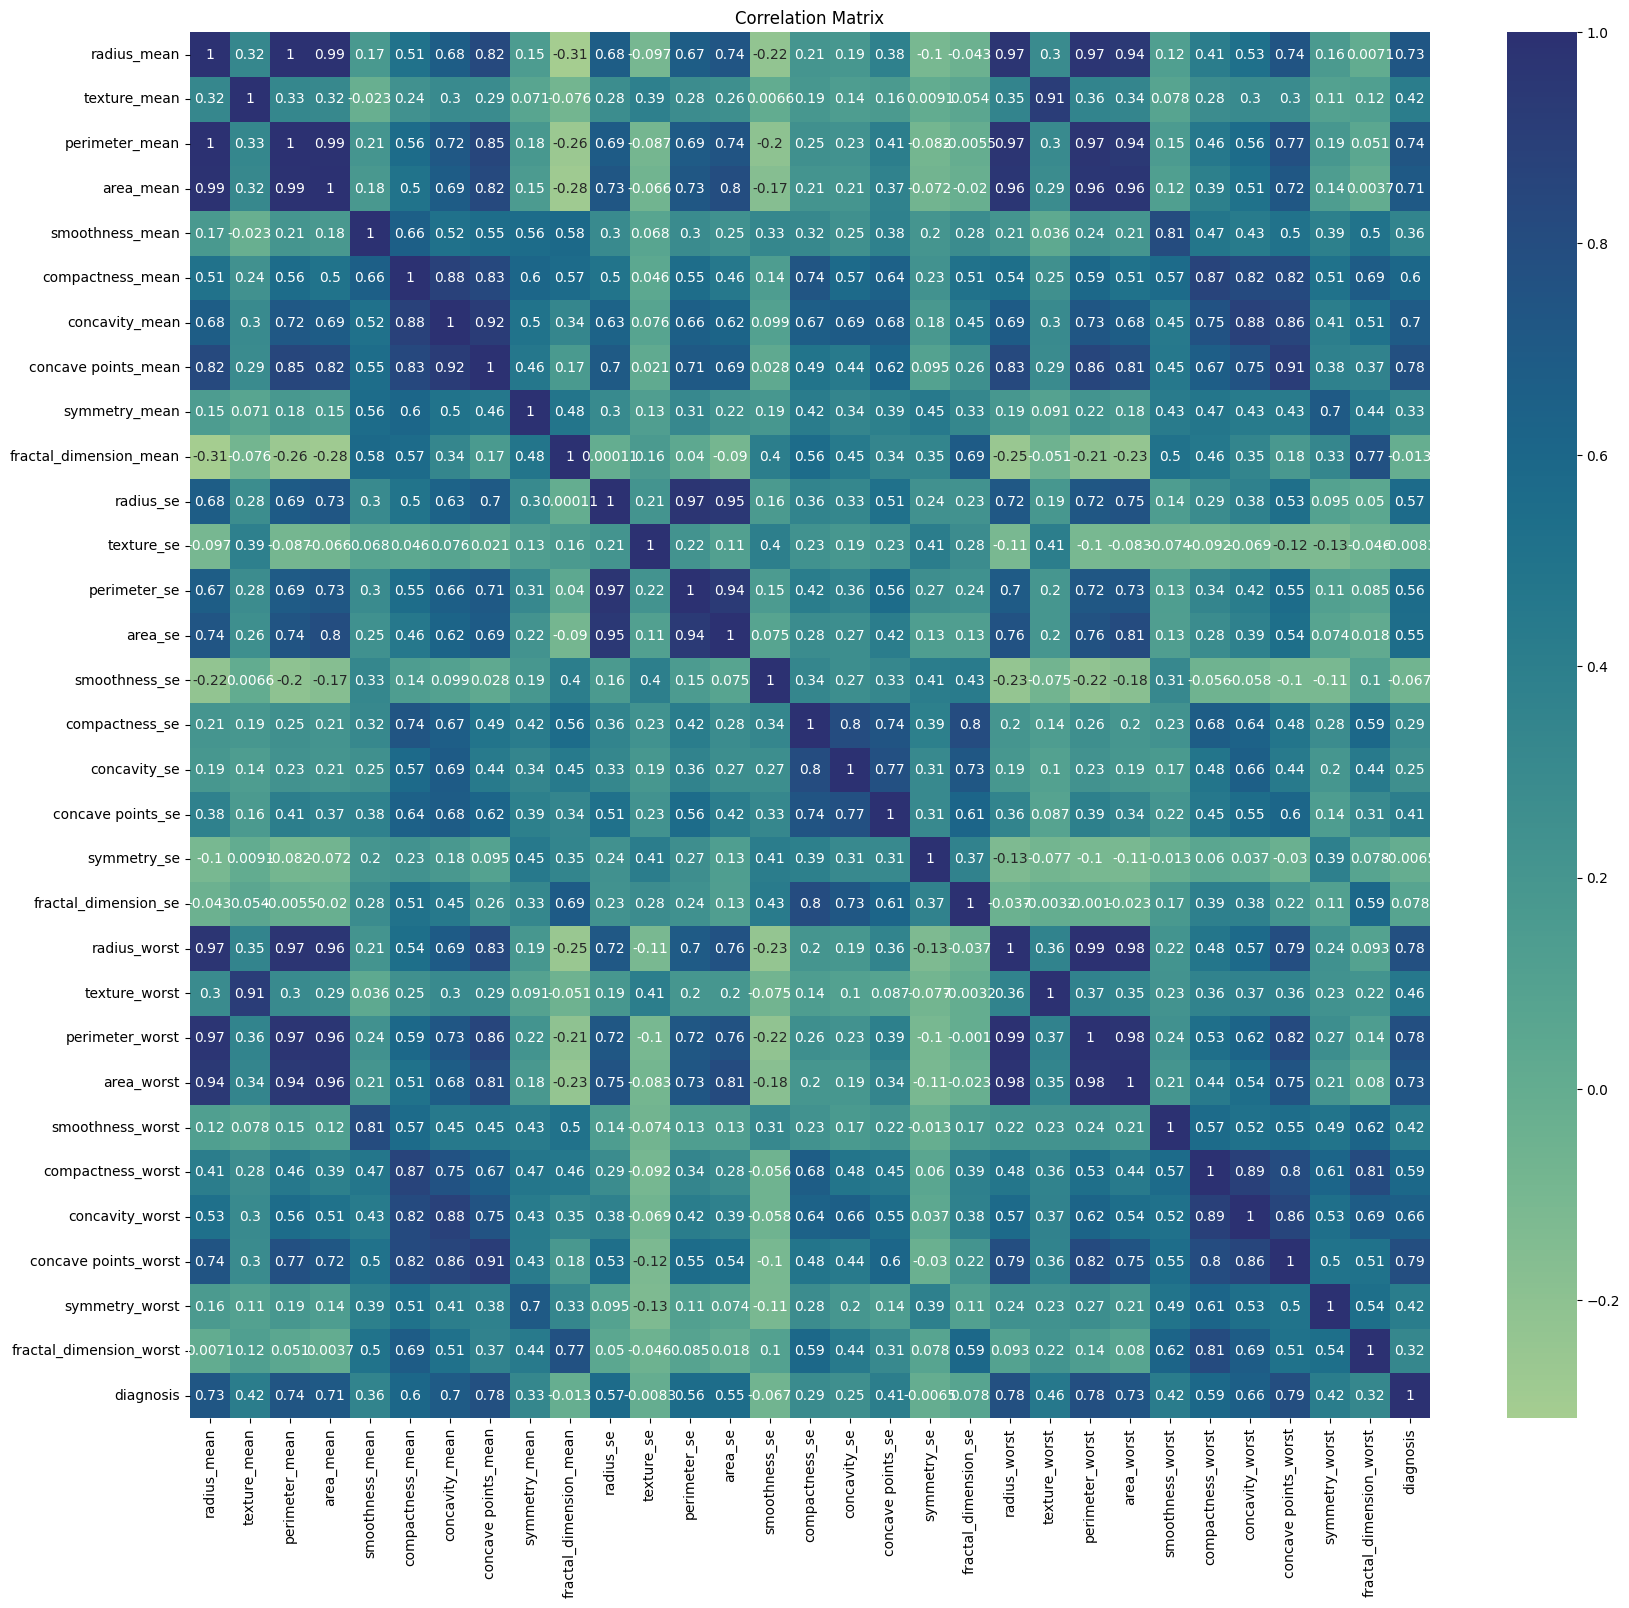

In [ ]:
# Correlation matrix with headmap among independent variables
import seaborn as sns
import matplotlib.pyplot as plt

correlation_all = data.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_all, annot= True, cmap= 'crest', square= False)
plt.title('Correlation Matrix')
plt.show

*The **concave point_mean** (**0.776**), **perimeter_worst** (**0.782**), and **concave points_worst** (**0.793**) have the strongest positive correlation with the target variable. These features might be particularly important in prediction the target variables.*

*Most of the features have a positive correlation with the target variable, meaning that as the value of the feature increases, the likelihood of the target variable being **M** (encoded as 1) also increases.*

*The **fractal_diemnsion_mean** (**-0.0128**), **texture_se** (**-0.0083**), and **symmetry_se** (**-0.0065**) have very weak negative correlations with the target variable compared to the other features.*

*There are some features that are highly correlated with each other, it is an indication of multicollinearity. It can cause problems in some machine learning models*

*It is important to note that correlation coefficients only capture linear relationships between variables and do not account for any potential nonlinear relationships. Additionally, correlation does not imply causation.*

Compare 4 ML methods:

*   Logistic regression
*   Decision tree classification
*   KNN: k nearest neighbours classification
*   Support vector machine (SVM) classification


1) Scale your whole dataset with MinMax scaler.

In [ ]:
# Scaling the data with MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# Independent Variables
minmaxscaler_X = MinMaxScaler()
minmaxscaled_X = minmaxscaler_X.fit_transform(X)
minmaxscaled_X_df = pd.DataFrame(minmaxscaled_X, columns = X.columns)

print('MinMax Scaled Independent Variables:')
print(minmaxscaled_X_df.head())

MinMax Scaled Independent Variables:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   fractal_dimension_mean  ...  radius_worst  texture_w

2) Divide your dataset into 2 parts: training set and testing set (80:20). Use defined random_state to reproduce the splitting for other Scaler. Output the dimension of the resulting datasets.

In [ ]:
# Spliting the data into a training set and a testing set with 80:20
from sklearn.model_selection import train_test_split

# Ensure the production of the same results every time the code is run
random_state = 42

X_df_minmax = minmaxscaled_X_df

# Split the data
X_train_minmax, X_test_minmax,Y_train2, Y_test2 = train_test_split(X_df_minmax, Y_encoded, test_size=0.2, random_state=random_state)

# Output the dimension of the resulting datasets
print('X_train_minmax dimension:', X_train_minmax.shape)
print('Y_train2 dimension :', Y_train2.shape)
print('X_test_minmax dimension:',X_test_minmax.shape)
print('Y_test2 dimension:', Y_test2.shape)

X_train_minmax dimension: (455, 30)
Y_train2 dimension : (455, 1)
X_test_minmax dimension: (114, 30)
Y_test2 dimension: (114, 1)


3) **Preliminary analysis:** Build 4 models based on 4 mentioned ML methods. For each model: train with training set and output the confusion matrix and accuracy of the model using training set. Test your models with the testset and output the confusion matrix and accuracy of the testset. Compare the same performance metrics calculated inside one model for training and testing sets. Find optimal parameters with GridSearchCV() function for each of the models for the whole dataset.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Define functions to evaluate the models and print the metrics

# Training set
def evaluate_model_training_set(model, X_train, Y_train, verbose=True):
  # Train the model with the training set
  model.fit(X_train, Y_train)

  # Metrics
  train_pred = model.predict(X_train)
  cm_train = confusion_matrix(Y_train, train_pred)
  acc_train = accuracy_score(Y_train, train_pred)

  # Output the confusion matrix and accuracy for the training set
  if verbose :
    print("Confusion matrix (training set): \n", cm_train)
    print("Accuracy (training set):", acc_train)

  return {'Confusion Matrix': cm_train, 'accuracy': acc_train}

# Testing set
def evaluate_model_testing_set(model, X_test, Y_test, verbose=True):
  # Test the model with the test set and calculate the metrics
  test_pred = model.predict(X_test)
  cm_test = confusion_matrix(Y_test, test_pred)
  acc_test = accuracy_score(Y_test, test_pred)

  # Output the confusion matrix and accuracy for the training set
  if verbose:
    print("Confusion matrix (testing set): \n", cm_test)
    print("Accuracy (testing set):", acc_test)

  return {'Confusion Matrix': cm_test, 'accuracy': acc_test}

**Linear logistic regression**

In [ ]:
# Build the logistic model
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

# Train with training set and output the confusion matrix and the accuracy using training set
print("Logistic regression (Training set):")
evaluate_model_training_set(logistic_regression, X_train_minmax, Y_train2)

Logistic regression (Training set):
Confusion matrix (training set): 
 [[285   1]
 [ 14 155]]
Accuracy (training set): 0.967032967032967


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Confusion Matrix': array([[285,   1],
        [ 14, 155]]),
 'accuracy': 0.967032967032967}

In [ ]:
# Test the model with the testset and output the confusion matrix and the accuracy using testing set
print("Logistic regression (Testing set):")
evaluate_model_testing_set(logistic_regression, X_test_minmax, Y_test2)

Logistic regression (Testing set):
Confusion matrix (testing set): 
 [[71  0]
 [ 2 41]]
Accuracy (testing set): 0.9824561403508771


{'Confusion Matrix': array([[71,  0],
        [ 2, 41]]),
 'accuracy': 0.9824561403508771}

**For the training set:**

*The **Logistic regression** model correctly classified **285** samples as **benign** and **165** samples as **malignant** in the training set. There were **1 fales positives**, but there were **6 false negatives**.*

**For the testing set:**

*For the testing set, the **Logistic regresion** model achieved an accuracy of approximately **98.2%**. In the confusion matrix, there were **no false positive** (benign samples incorrectly classified as malignant) and **2 false negatives** (malignant samples incorrectly classified as benign).*

**Conclusion:**

*The accuracy of approximately **96.7%** on the training set and **98.2%** on the testing set indicates that the logistic regression model is preforming well in terms of overall classification acciracy. But it is unusual to have a higher accuracy on the testing set compared to the training set. this may happens in some situations where the testing set happens to be easier or more representative of the underlying distribution. It is also possible that the mdoel is overfitting.*

In [ ]:
# Perform the gridsearch() function to find the optimal parameters for the logistic regression model with minmax scaler
# These parameters are reduced beceause of the lack of more computational power
from sklearn.model_selection import GridSearchCV

parameters_lr_minmax = {
    'penalty':['l1','l2', 'none'],
    'C':[0.01, 0.1, 1, 10],
    'solver':['newton-cg', 'lbfgs', 'saga'],
    'max_iter': [100,200, 500, 1000]
}
grid_search_lr_minmax = GridSearchCV(logistic_regression, parameters_lr_minmax, cv=5, scoring = 'accuracy', n_jobs=-1)
grid_search_lr_minmax.fit(X_df_minmax, Y_encoded.values.ravel())

# Output the best parameters
print("Best parameters for Logistic Regression:", grid_search_lr_minmax.best_params_)
print("Best score:", grid_search_lr_minmax.best_score_)

Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score: 0.9806862288464524


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

In [ ]:
# Testing the model using the best hyperparameters
def logistic_regression():
  logistic_regression2 = LogisticRegression(**grid_search_lr_minmax.best_params_)
  logistic_regression2.fit(X_train_minmax, Y_train2)
  return logistic_regression2

# Test the model with the best hyperparameters
lr_test = logistic_regression()
print('Metrics of the logistic regression model with the best hyperparameters (training set):')
evaluate_model_training_set(lr_test, X_train_minmax, Y_train2.values.ravel())

Metrics of the logistic regression model with the best hyperparameters (training set):
Confusion matrix (training set): 
 [[284   2]
 [  7 162]]
Accuracy (training set): 0.9802197802197802


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Confusion Matrix': array([[284,   2],
        [  7, 162]]),
 'accuracy': 0.9802197802197802}

In [ ]:
print('Metrics of the logistic regression model with the best hyperparameters (testing set):')
evaluate_model_testing_set(lr_test, X_test_minmax, Y_test2.values.ravel())

Metrics of the logistic regression model with the best hyperparameters (testing set):
Confusion matrix (testing set): 
 [[70  1]
 [ 2 41]]
Accuracy (testing set): 0.9736842105263158


{'Confusion Matrix': array([[70,  1],
        [ 2, 41]]),
 'accuracy': 0.9736842105263158}

In [ ]:
best_parameters_lr = {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

# Import the validation function
from sklearn.model_selection import cross_val_score

# Import make scorer function to get the accuracy metric
from sklearn.metrics import make_scorer, accuracy_score

accuracy_scorer = make_scorer(accuracy_score)

# Define the number of folds
folds = 5

# Write your code here for Logistic regression
cv_scores_lr = cross_val_score(LogisticRegression(**best_parameters_lr), X_df_minmax, Y_encoded.values.ravel(), cv=folds)
print("Logistic Regression CV accuracy", cv_scores_lr)
cv_average_accuracy_lr = np.mean(cv_scores_lr)

Logistic Regression CV accuracy [0.98245614 0.98245614 0.98245614 0.96491228 0.99115044]


In [ ]:
print('Logistic Regression CV average:', cv_average_accuracy_lr)

Logistic Regression CV average: 0.9806862288464524


**Decision Tree classification**

In [ ]:
# Build the decision tree model
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=random_state)
# Train with training set and output the confusion matrix and the accuracy using training set
print("Decision tree (Training set):")
evaluate_model_training_set(decision_tree, X_train_minmax, Y_train2)

Decision tree (Training set):
Confusion matrix (training set): 
 [[286   0]
 [  0 169]]
Accuracy (training set): 1.0


{'Confusion Matrix': array([[286,   0],
        [  0, 169]]),
 'accuracy': 1.0}

In [ ]:
# Test the model with the testset and output the confusion matrix and the accuracy using testing set
print("Decision tree (Testing set):")
evaluate_model_testing_set(decision_tree, X_test_minmax, Y_test2)

Decision tree (Testing set):
Confusion matrix (testing set): 
 [[68  3]
 [ 3 40]]
Accuracy (testing set): 0.9473684210526315


{'Confusion Matrix': array([[68,  3],
        [ 3, 40]]),
 'accuracy': 0.9473684210526315}

**For the training set:**

*The **Decision Tree classifier** has perfectly classified all the samples in the training set, achieving **100%** accuracy. There are no false positives or false negatives.*

**For the testing set:**

*For the testing set, the classifier achieved an accuracy of approximatly **94.7%**. In the confusion matrix, there were **3 false positives** ( benign samples incorrectly classified as malignant) and **3 false negatives** ( malignant samples incorrectly classified as benign).*

**Conclusion:**

*The high accuracy on the training set and lower accuracy on the testing set suggest that the **Decision Tree** model may be overfitting the data. It is not generalizing well the new, unseen data.*
*We may consider tuning the hyperparameters of the decision tree classifier.*

In [ ]:
# Perform the girdsearch() function to find the optimal parameters for the decision tree model with minmax scaler
parameters_dt_minmax = {'max_depth': [None, 3, 5, 7, 10],
                 'min_samples_split': [2, 5, 10, 20],
                 'min_samples_leaf': [1, 2, 5, 10],
                 'max_features': [None, 'sqrt', 'log2']}

grid_search_dt_minmax = GridSearchCV(decision_tree, parameters_dt_minmax, cv=5, scoring= 'accuracy')
grid_search_dt_minmax.fit(X_df_minmax, Y_encoded.values.ravel())

# Output the best parameters
print('Best parameters for Decision Tree:', grid_search_dt_minmax.best_params_)
print('Best score:', grid_search_dt_minmax.best_score_)

Best parameters for Decision Tree: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score: 0.9384878124514827


In [ ]:
# Testing the model using the best hyperparameters
def decision_tree():
  decision_tree2 = DecisionTreeClassifier(**grid_search_dt_minmax.best_params_)
  decision_tree2.fit(X_train_minmax, Y_train2)
  return decision_tree2

# Test the model with the best hyperparameters
dt_test = decision_tree()
print('Metrics of the decision tree model with the best hyperparameters (training set):')
evaluate_model_training_set(dt_test, X_train_minmax, Y_train2.values.ravel())

Metrics of the decision tree model with the best hyperparameters (training set):
Confusion matrix (training set): 
 [[286   0]
 [ 10 159]]
Accuracy (training set): 0.978021978021978


{'Confusion Matrix': array([[286,   0],
        [ 10, 159]]),
 'accuracy': 0.978021978021978}

In [ ]:
print('Metrics of the decision tree model with the best hyperparameters (testing set):')
evaluate_model_testing_set(dt_test, X_test_minmax, Y_test2.values.ravel())

Metrics of the decision tree model with the best hyperparameters (testing set):
Confusion matrix (testing set): 
 [[68  3]
 [ 3 40]]
Accuracy (testing set): 0.9473684210526315


{'Confusion Matrix': array([[68,  3],
        [ 3, 40]]),
 'accuracy': 0.9473684210526315}

In [ ]:
best_parameters_dt = {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}

#Write your code here for Decision Tree classification
cv_scores_dt = cross_val_score(DecisionTreeClassifier(**best_parameters_dt), X_df_minmax, Y_encoded.values.ravel(), cv=folds)
print("Decision Tree CV accuracy", cv_scores_dt)
cv_average_accuracy_dt = np.mean(cv_scores_dt)

Decision Tree CV accuracy [0.92105263 0.92982456 0.92105263 0.95614035 0.94690265]


In [ ]:
print('Decision Tree CV accuracy:', cv_average_accuracy_dt)

Decision Tree CV accuracy: 0.9349945660611706


**kNN: k nearest neighbours classification**

In [ ]:
# Build the KNN model
from sklearn.neighbors import KNeighborsClassifier

knn_minmax = KNeighborsClassifier()
# Train with training set and output the confusion matrix and the accuracy using training set
print("KNN (Training set):")
evaluate_model_training_set(knn_minmax, X_train_minmax, Y_train2)

KNN (Training set):
Confusion matrix (training set): 
 [[286   0]
 [ 10 159]]
Accuracy (training set): 0.978021978021978


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'Confusion Matrix': array([[286,   0],
        [ 10, 159]]),
 'accuracy': 0.978021978021978}

In [ ]:
# Test the model with the testset and output the confusion matrix and the accuracy using testing set
print("KNN (Testing set):")
evaluate_model_testing_set(knn_minmax, X_test_minmax, Y_test2)

KNN (Testing set):
Confusion matrix (testing set): 
 [[69  2]
 [ 2 41]]
Accuracy (testing set): 0.9649122807017544


{'Confusion Matrix': array([[69,  2],
        [ 2, 41]]),
 'accuracy': 0.9649122807017544}

**For the training set:**

*The **KNN** classifier correctly cassified **286** samples as **benign** and **160** samples as **malignant** in the training set. There were no **false positives**, but there were 10 **fasle negatives**  ( malignant samples incorrectly classified as benign).*

**For the testing set:**

*The **KNN** classifier achieved an accuracy of approximately **96.4%**. In the confusion matrix, there were **2 false positives** ( benign samples incorrectly classifies as malignant) and **2 false negatives** (malignant samples incorrectly cassified as benign).*

**Conclusion:**

*The accuracy of approximately **97.8%** on the training set and **96.4%** on the testing set indicates that the **KNN** model is performing well in terms of overall classification accuracy. The model shows string predictive ability and generalizes well the new samples.*

In [ ]:
# Perform the girdsearch() function to find the optimal parameters fro the knn model with minmax scaler
parameters_knn_minmax = {'n_neighbors': [3, 5, 7, 10, 15, 20],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}

grid_search_knn_minmax = GridSearchCV(knn_minmax, parameters_knn_minmax, scoring= 'accuracy', cv=5)
grid_search_knn_minmax.fit(X_df_minmax, Y_encoded.values.ravel())

# Output the best parameters
print('Best parameters for knn:', grid_search_knn_minmax.best_params_)
print('Best score:', grid_search_knn_minmax.best_score_)

Best parameters for knn: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best score: 0.9701133364384411


In [ ]:
# Testing the model using the best hyperparameters
def knn():
  knn2 = KNeighborsClassifier(**grid_search_knn_minmax.best_params_)
  knn2.fit(X_train_minmax, Y_train2)
  return knn2

# Test the model with the best hyperparameters
knn_test = knn()
print('Metrics of the knn model with the best hyperparameters (training set):')
evaluate_model_training_set(knn_test, X_train_minmax, Y_train2.values.ravel())

Metrics of the knn model with the best hyperparameters (training set):
Confusion matrix (training set): 
 [[285   1]
 [  4 165]]
Accuracy (training set): 0.989010989010989


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'Confusion Matrix': array([[285,   1],
        [  4, 165]]),
 'accuracy': 0.989010989010989}

In [ ]:
print('Metrics of the knn model with the best hyperparameters (testing set):')
evaluate_model_testing_set(knn_test, X_test_minmax, Y_test2.values.ravel())

Metrics of the knn model with the best hyperparameters (testing set):
Confusion matrix (testing set): 
 [[69  2]
 [ 2 41]]
Accuracy (testing set): 0.9649122807017544


{'Confusion Matrix': array([[69,  2],
        [ 2, 41]]),
 'accuracy': 0.9649122807017544}

In [ ]:
best_parameters_knn = {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

#Write your code here for #kNN: k nearest neighbours classification
cv_scores_knn = cross_val_score(KNeighborsClassifier(**best_parameters_knn), X_df_minmax, Y_encoded.values.ravel(), cv=folds)
print("KNN CV accuracy", cv_scores_knn)
cv_average_accuracy_knn = np.mean(cv_scores_knn)

KNN CV accuracy [0.96491228 0.97368421 0.99122807 0.95614035 0.96460177]


In [ ]:
print('KNN CV accuracy:', cv_average_accuracy_knn)

KNN CV accuracy: 0.9701133364384411


**Support vector machine**

In [ ]:
# Build the SVM model
from sklearn.svm import SVC
svm_minmax = SVC()

# Train with training set and output the confusion matrix and the accuracy using training set
print("SVM (Training set):")
evaluate_model_training_set(svm_minmax, X_train_minmax, Y_train2)

SVM (Training set):
Confusion matrix (training set): 
 [[284   2]
 [  6 163]]
Accuracy (training set): 0.9824175824175824


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Confusion Matrix': array([[284,   2],
        [  6, 163]]),
 'accuracy': 0.9824175824175824}

In [ ]:
# Test the model with the testset and output the confusion matrix and the accuracy using testing set
print("SVM (Testing set):")
evaluate_model_testing_set(svm_minmax, X_test_minmax, Y_test2)

SVM (Testing set):
Confusion matrix (testing set): 
 [[70  1]
 [ 2 41]]
Accuracy (testing set): 0.9736842105263158


{'Confusion Matrix': array([[70,  1],
        [ 2, 41]]),
 'accuracy': 0.9736842105263158}

**For the training set:**

*The **SVM** classifier correctly classified **284** samples as **benign** and **163** samples as **malignant** in the training set. There were **2 fales positives** (benign samples incorrectly classified as malignant), and there were **6 false negatives**(malignant samples incorrectly classified as benign) .*

**For the testing set:**

*For the testing set, the **SVM** classifier achieved an accuracy of approximately **97.3%**. In the confusion matrix, there were **1 false positive** (benign samples incorrectly classified as malignant) and **2 false negatives** (malignant samples incorrectly classified as benign).*

In [ ]:
# Perform the girdsearch() function to find the optimal parameters fro the SVM model with minmax scaler
parameters_svm_minmax = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                  'C': [0.01, 0.1, 1, 10, 100],
                  'gamma': ['scale', 'auto'],
                  'degree': [2, 3, 4] #Only for poly kernel
                  }

grid_search_svm_minmax = GridSearchCV(svm_minmax, parameters_svm_minmax, scoring= 'accuracy', cv=5)
grid_search_svm_minmax.fit(X_df_minmax, Y_encoded.values.ravel())

# Output the best parameters
print('Best parameters for SVM:', grid_search_svm_minmax.best_params_)
print('Best Score:', grid_search_svm_minmax.best_score_)

Best parameters for SVM: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}
Best Score: 0.9806707033069397


In [ ]:
# Testing the model using the best hyperparameters
def svm():
  svm2 = SVC(**grid_search_svm_minmax.best_params_)
  svm2.fit(X_train_minmax, Y_train2)
  return svm2

# Test the model with the best hyperparameters
svm_test = svm()
print('Metrics of the svm model with the best hyperparameters (training set):')
evaluate_model_training_set(svm_test, X_train_minmax, Y_train2.values.ravel())

Metrics of the svm model with the best hyperparameters (training set):
Confusion matrix (training set): 
 [[284   2]
 [  6 163]]
Accuracy (training set): 0.9824175824175824


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Confusion Matrix': array([[284,   2],
        [  6, 163]]),
 'accuracy': 0.9824175824175824}

In [ ]:
print('Metrics of the svm model with the best hyperparameters (testing set):')
evaluate_model_testing_set(svm_test, X_test_minmax, Y_test2.values.ravel())

Metrics of the svm model with the best hyperparameters (testing set):
Confusion matrix (testing set): 
 [[71  0]
 [ 2 41]]
Accuracy (testing set): 0.9824561403508771


{'Confusion Matrix': array([[71,  0],
        [ 2, 41]]),
 'accuracy': 0.9824561403508771}

In [ ]:
best_parameters_svm = {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}

#Support vector machine classification
cv_scores_svm = cross_val_score(SVC(**best_parameters_svm), X_df_minmax, Y_encoded.values.ravel(), cv=folds)
print("SVM CV accuracy", cv_scores_svm)
cv_average_accuracy_svm = np.mean(cv_scores_svm)

SVM CV accuracy [0.98245614 0.98245614 0.99122807 0.96491228 0.98230088]


In [ ]:
print('SVM CV accuracy:', cv_average_accuracy_svm)

SVM CV accuracy: 0.9806707033069397


# **`Task 1 "Data Analysis (Assignment 2)`**

Compare 4 ML methods:

*   Random Forest classifier
*   XGBoost classifier
*   CatBoost classifier
*   Light GBM classifier



1) Scale your whole dataset. Try different scalings for your dataset. (Standard Scaler, MinMax Scaler). Experiment with Standard Scaler first.

**Random Forest classifier**

In [ ]:
# Build random forest classification
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state=random_state)

# train with training set and output the confusion matrix and the accuracy of the model
print('Random forest (training set):')
evaluate_model_training_set(rf_classifier, X_train_minmax, Y_train2)

Random forest (training set):


<ipython-input-18-f718c928ffea>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


Confusion matrix (training set): 
 [[286   0]
 [  0 169]]
Accuracy (training set): 1.0


{'Confusion Matrix': array([[286,   0],
        [  0, 169]]),
 'accuracy': 1.0}

In [ ]:
# test with testing set and output the confusion matrix and the accuracy of the model
print('Random forest (testing set)')
evaluate_model_testing_set(rf_classifier, X_test_minmax, Y_test2)

Random forest (testing set)
Confusion matrix (testing set): 
 [[70  1]
 [ 3 40]]
Accuracy (testing set): 0.9649122807017544


{'Confusion Matrix': array([[70,  1],
        [ 3, 40]]),
 'accuracy': 0.9649122807017544}

*It appears that the model has perfectly classified all the samples in the training set. The accuracy, which is **1.0**, indicating a perfect score. However, this could be a sign of overfitting, meaning the model may not generalize well to unseen data.*
*The accuracy on the testing set is approximately **0.965**, which is very good. However, there's a small number of missclassifications, as shown by the non-zero values outside the diagonal of the confusion matrix.*

In [ ]:
# Perform the girdsearch() function to find the optimal parameters fro the svm model
parameters_rf = {'bootstrap': [True, False],
                 'max_depth': [10, 50, 100],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_split': [2, 6, 10],
                 'min_samples_leaf': [1, 3, 4],
                 'n_estimators': [20, 100]
                 }

grid_search_rf = GridSearchCV(rf_classifier, parameters_rf, scoring= 'accuracy', cv=5)
grid_search_rf.fit(X_df_minmax, Y_encoded.values.ravel())

# Output the best parameters
print('Best parameters for Random Forest:', grid_search_rf.best_params_)
print('Best Score:', grid_search_rf.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
Best Score: 0.9701599130569788


*Testing the model with the optimal jyüer-parameters.*

In [ ]:
# Testing the model using the best hyperparameters
def random_forest():
  rf2 = RandomForestClassifier(**grid_search_rf.best_params_)
  rf2.fit(X_train_minmax, Y_train2)
  return rf2

# Test the model with the best hyperparameters
rf_test = random_forest()
print('Metrics of the rf model with the best hyperparameters (training set):')
evaluate_model_training_set(rf_test, X_train_minmax, Y_train2.values.ravel())

<ipython-input-50-4bd75520a9bf>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(X_train_minmax, Y_train2)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Metrics of the rf model with the best hyperparameters (training set):


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Confusion matrix (training set): 
 [[286   0]
 [  0 169]]
Accuracy (training set): 1.0


{'Confusion Matrix': array([[286,   0],
        [  0, 169]]),
 'accuracy': 1.0}

In [ ]:
print('Metrics of the rf model with the best hyperparameters (testing set):')
evaluate_model_testing_set(rf_test, X_test_minmax, Y_test2.values.ravel())

Metrics of the rf model with the best hyperparameters (testing set):
Confusion matrix (testing set): 
 [[70  1]
 [ 3 40]]
Accuracy (testing set): 0.9649122807017544


{'Confusion Matrix': array([[70,  1],
        [ 3, 40]]),
 'accuracy': 0.9649122807017544}

**XGBoost classifier**

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Build the XGboost model
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()

# train with training set and output the confusion matrix and the accuracy of the model
print('XGboost (training set):')
evaluate_model_training_set(xgb_classifier, X_train_minmax, Y_train2)

XGboost (training set):
Confusion matrix (training set): 
 [[286   0]
 [  0 169]]
Accuracy (training set): 1.0


{'Confusion Matrix': array([[286,   0],
        [  0, 169]]),
 'accuracy': 1.0}

In [ ]:
# test with testing set and output the confusion matrix and the accuracy of the model
print('XGboost (testing set):')
evaluate_model_testing_set(xgb_classifier, X_test_minmax, Y_test2)

XGboost (testing set):
Confusion matrix (testing set): 
 [[69  2]
 [ 3 40]]
Accuracy (testing set): 0.956140350877193


{'Confusion Matrix': array([[69,  2],
        [ 3, 40]]),
 'accuracy': 0.956140350877193}

*For the training set there were no **False Positives** or **False Negatives**. As a result, the accuracy on the training set is **1.0**, which means the model achieved a perfect classification on the training data.*
*The accuracy on the testing set is approximately **0.956**, which means the model correctly predicted about **95.6%** of the testing set instances. It indicates that the model performs well on the unseen data.*

*There is a discrepancy between training accuracy and testing accuracy, it might signal overfitting. The **XGBoost** model is slightly overfitting, but the performance on the test set is still quite strong.*

In [ ]:
# Perform the girdsearch() function to find the optimal parameters fro the svm model
parameters_xgb = {'max_depth': [3, 6, 9],
                 'gamma': [0, 0.2, 0.4],
                 'reg_alpha': [1e-5, 100],
                 'reg_lambda': [0, 0.5, 1],
                 'colsample_bytree': [0.6, 0.8, 1],
                 'subsample': [0.6, 0.8],
                  'min_child_weight': [1, 3],
                  'n_estimators': [10, 100]
                 }

grid_search_xgb = GridSearchCV(xgb_classifier, parameters_xgb, scoring= 'accuracy', cv=5)
grid_search_xgb.fit(X_df_minmax, Y_encoded.values.ravel())

# Output the best parameters
print('Best parameters for XGboost:', grid_search_xgb.best_params_)
print('Best Score:', grid_search_xgb.best_score_)

Best parameters for XGboost: {'colsample_bytree': 0.6, 'gamma': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 1e-05, 'reg_lambda': 0, 'subsample': 0.8}
Best Score: 0.9771619313771154


*Testing the model with the optimal jyüer-parameters.*

In [ ]:
# Testing the model using the best hyperparameters
def xgboost():
  xgb2 = XGBClassifier(**grid_search_xgb.best_params_)
  xgb2.fit(X_train_minmax, Y_train2)
  return xgb2

# Test the model with the best hyperparameters
xgb_test = xgboost()
print('Metrics of the XGBoost model with the best hyperparameters (training set):')
evaluate_model_training_set(xgb_test, X_train_minmax, Y_train2.values.ravel())

Metrics of the XGBoost model with the best hyperparameters (training set):
Confusion matrix (training set): 
 [[286   0]
 [  0 169]]
Accuracy (training set): 1.0


{'Confusion Matrix': array([[286,   0],
        [  0, 169]]),
 'accuracy': 1.0}

In [ ]:
print('Metrics of the XGBoost model with the best hyperparameters (testing set):')
evaluate_model_testing_set(xgb_test, X_test_minmax, Y_test2.values.ravel())

Metrics of the XGBoost model with the best hyperparameters (testing set):
Confusion matrix (testing set): 
 [[70  1]
 [ 1 42]]
Accuracy (testing set): 0.9824561403508771


{'Confusion Matrix': array([[70,  1],
        [ 1, 42]]),
 'accuracy': 0.9824561403508771}

**CatBoost classifier**

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.2 MB/s eta 0:00:00


In [ ]:
# Build the catboost model
from catboost import CatBoostClassifier
cat_classifier = CatBoostClassifier(verbose=False)

# train with training set and output the confusion matrix and accuracy.
print('Catboost (training set):')
evaluate_model_training_set(cat_classifier, X_train_minmax, Y_train2)

Catboost (training set):
Confusion matrix (training set): 
 [[286   0]
 [  0 169]]
Accuracy (training set): 1.0


{'Confusion Matrix': array([[286,   0],
        [  0, 169]]),
 'accuracy': 1.0}

In [ ]:
# test with testing set and output the confusion matrix and accuracy.
print('Catboost (testing set):')
evaluate_model_testing_set(cat_classifier, X_test_minmax, Y_test2)

Catboost (testing set):
Confusion matrix (testing set): 
 [[70  1]
 [ 2 41]]
Accuracy (testing set): 0.9736842105263158


{'Confusion Matrix': array([[70,  1],
        [ 2, 41]]),
 'accuracy': 0.9736842105263158}

*The accuracy of the model in the training set is **1.0**, which indicates perfect prediction.*
*The accuracy on the testing set is approximately **0.974**. which means the model correctly predicted **97.4%** of the testing set instances. The model does, howerver, show potential signs of overfitting, as indicated by the perfect score on the training set.*

In [ ]:
# Perform the girdsearch() function to find the optimal parameters fro the cat model
parameters_cat = {'depth': [2, 4, 6, 8, 10],
                 'learning_rate': [0.01, 0.02, 0.04],
                 'iterations': [10, 50, 90, 100]
                 }

grid_search_cat = GridSearchCV(cat_classifier, parameters_cat, scoring= 'accuracy', cv=5)
grid_search_cat.fit(X_df_minmax, Y_encoded.values.ravel())

# Output the best parameters
print('Best parameters for Catboost:', grid_search_cat.best_params_)
print('Best Score:', grid_search_cat.best_score_)

Best parameters for Catboost: {'depth': 4, 'iterations': 90, 'learning_rate': 0.04}
Best Score: 0.9736531594472908


*Testing the model with the optimal jyüer-parameters.*

In [ ]:
# Testing the model using the best hyperparameters
def catboost():
  cat2 = CatBoostClassifier(**grid_search_cat.best_params_, verbose= False)
  cat2.fit(X_train_minmax, Y_train2)
  return cat2

# Test the model with the best hyperparameters
cat_test = catboost()
print('Metrics of the CatBoost model with the best hyperparameters (training set):')
evaluate_model_training_set(cat_test, X_train_minmax, Y_train2.values.ravel())

Metrics of the CatBoost model with the best hyperparameters (training set):
Confusion matrix (training set): 
 [[286   0]
 [  2 167]]
Accuracy (training set): 0.9956043956043956


{'Confusion Matrix': array([[286,   0],
        [  2, 167]]),
 'accuracy': 0.9956043956043956}

In [ ]:
print('Metrics of the CatBoost model with the best hyperparameters (testing set):')
evaluate_model_testing_set(cat_test, X_test_minmax, Y_test2.values.ravel())

Metrics of the CatBoost model with the best hyperparameters (testing set):
Confusion matrix (testing set): 
 [[71  0]
 [ 3 40]]
Accuracy (testing set): 0.9736842105263158


{'Confusion Matrix': array([[71,  0],
        [ 3, 40]]),
 'accuracy': 0.9736842105263158}

**Light GBM classifier**

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Build the lgbm regression
from lightgbm import LGBMClassifier
lgb_classifier = LGBMClassifier()

# train with training set and output the confusion matrix and accuracy
print('LGBM (training set):')
evaluate_model_training_set(lgb_classifier, X_train_minmax, Y_train2)

LGBM (training set):


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Confusion matrix (training set): 
 [[286   0]
 [  0 169]]
Accuracy (training set): 1.0


{'Confusion Matrix': array([[286,   0],
        [  0, 169]]),
 'accuracy': 1.0}

In [ ]:
# train with training set and output the confusion matrix and accuracy
print('LGBM (testing set):')
evaluate_model_testing_set(lgb_classifier, X_test_minmax, Y_test2)

LGBM (testing set):
Confusion matrix (testing set): 
 [[70  1]
 [ 3 40]]
Accuracy (testing set): 0.9649122807017544


{'Confusion Matrix': array([[70,  1],
        [ 3, 40]]),
 'accuracy': 0.9649122807017544}

*The accuracy on the training set is **1.0**, indicating perfect classification.*
*The accuracy on the testing set is approximately **0.965**, meaning the model correctly predicted about **96.5%** of the testing instances.*

*The model does show a potential signs of overfitting, as evidenced by the perfect score on the training set.*

In [ ]:
# Perform the girdsearch() function to find the optimal parameters fro the LGBM model
parameters_lgb = {'bagging_fraction': [0.1, 0.2, 0.3],
                 'feature_fraction': [0.1, 0.2, 0.3],
                  'max_depth': [4, 5, 6, 7],
                  'min_data_in_leaf': [30, 45, 60],
                  'num_leaves': [500, 650, 800]
                 }

grid_search_lgb = GridSearchCV(lgb_classifier, parameters_lgb, scoring= 'accuracy', cv=5)
grid_search_lgb.fit(X_df_minmax, Y_encoded.values.ravel())

# Output the best parameters
print('Best parameters for Light GBM:', grid_search_lgb.best_params_)
print('Best Score:', grid_search_lgb.best_score_)

[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging

*Testing the model with the optimal jyüer-parameters.*

In [ ]:
# Testing the model using the best hyperparameters
def lgbm():
  lgb2 = LGBMClassifier(**grid_search_cat.best_params_)
  lgb2.fit(X_train_minmax, Y_train2)
  return lgb2

# Test the model with the best hyperparameters
lgb_test = lgbm()
print('Metrics of the Light GBM model with the best hyperparameters (training set):')
evaluate_model_training_set(lgb_test, X_train_minmax, Y_train2.values.ravel())

Metrics of the Light GBM model with the best hyperparameters (training set):
Confusion matrix (training set): 
 [[286   0]
 [  0 169]]
Accuracy (training set): 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


{'Confusion Matrix': array([[286,   0],
        [  0, 169]]),
 'accuracy': 1.0}

In [ ]:
print('Metrics of the Light GBM model with the best hyperparameters (testing set):')
evaluate_model_testing_set(lgb_test, X_test_minmax, Y_test2.values.ravel())

Metrics of the Light GBM model with the best hyperparameters (testing set):
Confusion matrix (testing set): 
 [[69  2]
 [ 2 41]]
Accuracy (testing set): 0.9649122807017544


{'Confusion Matrix': array([[69,  2],
        [ 2, 41]]),
 'accuracy': 0.9649122807017544}

Output the results: (1) create a dataframe with two columns, which correspond to the accuracy for the training set and testset and rows correspond to each model. (2) create a dataframe with 5 columns, which correspond to "real values" and predicted values by each model on the testset and rows correspond to the observations from the testset.

In [ ]:
# Dictionary to store all the accuracy values of each model
data_dict = {
    "Model": ["Rnadom forest", "XGBoost", "Catboost", "Light GBM"],
    "Training set accuracy": [1.0, 1.0, 0.995, 1.0],
    "Testing set accuracy": [0.9649, 0.9824, 0.9736, 0.9649]
}

accuracy_df = pd.DataFrame(data_dict)
accuracy_df

,Model,Training set accuracy,Testing set accuracy
0,Rnadom forest,1.000,0.9649
1,XGBoost,1.000,0.9824
2,Catboost,0.995,0.9736
3,Light GBM,1.000,0.9649


In [ ]:
# Get the predictions of each model
test_pred_rf = rf_test.predict(X_test_minmax)
test_pred_xgb = xgb_test.predict(X_test_minmax)
test_pred_cat = cat_test.predict(X_test_minmax)
test_pred_lgb = lgb_test.predict(X_test_minmax)

# Dictionary to store the predictions and the real values
predictions_dict = {
    "Real values": Y_test2.values.ravel(),
    "Predicted in RF" : test_pred_rf,
    "Predicted in XGBoost" : test_pred_xgb,
    "Predicted in CatBoost" : test_pred_cat,
    "Predicted in Light GBM" : test_pred_lgb
}

predictions_df = pd.DataFrame(predictions_dict)
predictions_df.head(50)

,Real values,Predicted in RF,Predicted in XGBoost,Predicted in CatBoost,Predicted in Light GBM
0,0,0,0,0,0
1,1,1,1,1,1
2,1,1,1,1,1
3,0,0,0,0,0
4,0,0,0,0,0
5,1,1,1,1,1
6,1,1,1,1,1
7,1,1,1,1,1
8,0,1,1,0,1
9,0,0,0,0,0


Are there any observation, which were wrongly classified by all models?

In [ ]:
# Creat a list to store the observations wrongly classified by all the models
wrongly_classified_by_all = []

for index, row in predictions_df.iterrows():
  if(row['Real values'] != row['Predicted in RF'] and
     row['Real values'] != row['Predicted in XGBoost'] and
     row['Real values'] != row['Predicted in CatBoost'] and
     row['Real values'] != row['Predicted in Light GBM']):
    wrongly_classified_by_all.append(index)

print(f"Observations wrongly classified by all models: {wrongly_classified_by_all}")

Observations wrongly classified by all models: [20]


*There is only 1 observation in the test set (**20**) that were wrongly classified by all 4 models. It could indicate that this specific observations have features that make it difficult for the models to classify correctly.*

2) Use the functions cross_val_score() or cross_validation() and make 5-fold cross validation.
Use the best hyper-parameter values for each model found previously. Use the whole
dataset.

**CV for Random Forest Classifier**

In [ ]:
# Write your code here for Random forest
cv_scores_rf = cross_val_score(RandomForestClassifier(**grid_search_rf.best_params_), X_df_minmax, Y_encoded.values.ravel(), cv=folds)
print("Random forest CV accuracy", cv_scores_rf)
cv_average_accuracy_rf = np.mean(cv_scores_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Random forest CV accuracy [0.92982456 0.94736842 0.97368421 0.97368421 0.98230088]


In [ ]:
print('Random forest CV accuracy:', cv_average_accuracy_rf)

Random forest CV accuracy: 0.9613724576929048


*The scores range from approximately **0.921** to **0.991**, indicating that the lowest accuracy achieved on any fold was about **92.1%**, and the highest accuracy was about **99.1%**. This generally a strong performance, suggesting that the **Random Forest** model is effective at predicting the target variable.*

**CV for XGBoost Classifier**

In [ ]:
# Write your code here for XGBoost
cv_scores_xgb = cross_val_score(XGBClassifier(**grid_search_xgb.best_params_), X_df_minmax, Y_encoded.values.ravel(), cv=folds)
print("XGBoost CV accuracy", cv_scores_xgb)
cv_average_accuracy_xgb = np.mean(cv_scores_xgb)

XGBoost CV accuracy [0.96491228 0.96491228 1.         0.97368421 0.98230088]


In [ ]:
print('XGBoost CV accuracy:', cv_average_accuracy_xgb)

XGBoost CV accuracy: 0.9771619313771154


*The accuracy scores ramge from about **0.965** to **1.0**. This means the model's performance, as measured by accuracy, is quite high on all folds, ranging from **96.5%** to **100%** correct predictions. The model's performance is stable across different subsets of data.*

**CV for CatBoost Classifier**

In [ ]:
# Write your code here for Catboost
cv_scores_cat = cross_val_score(CatBoostClassifier(**grid_search_cat.best_params_), X_df_minmax, Y_encoded.values.ravel(), cv=folds)
print("CatBoost CV accuracy", cv_scores_cat)
cv_average_accuracy_cat = np.mean(cv_scores_cat)

0:	learn: 0.6292627	total: 3.43ms	remaining: 305ms
1:	learn: 0.5660454	total: 8.48ms	remaining: 373ms
2:	learn: 0.5156320	total: 12.6ms	remaining: 365ms
3:	learn: 0.4866526	total: 15.7ms	remaining: 338ms
4:	learn: 0.4502496	total: 18.5ms	remaining: 314ms
5:	learn: 0.4172781	total: 21.4ms	remaining: 300ms
6:	learn: 0.3763018	total: 24.4ms	remaining: 289ms
7:	learn: 0.3490409	total: 27.2ms	remaining: 279ms
8:	learn: 0.3224263	total: 29.9ms	remaining: 269ms
9:	learn: 0.2945120	total: 32.6ms	remaining: 261ms
10:	learn: 0.2719341	total: 36.3ms	remaining: 261ms
11:	learn: 0.2561054	total: 39.3ms	remaining: 255ms
12:	learn: 0.2383060	total: 42.1ms	remaining: 249ms
13:	learn: 0.2209763	total: 45ms	remaining: 244ms
14:	learn: 0.2079961	total: 47.8ms	remaining: 239ms
15:	learn: 0.1953639	total: 53.5ms	remaining: 247ms
16:	learn: 0.1844521	total: 60.2ms	remaining: 259ms
17:	learn: 0.1747617	total: 63.2ms	remaining: 253ms
18:	learn: 0.1641665	total: 67.6ms	remaining: 253ms
19:	learn: 0.1562783	tot

In [ ]:
print('CatBoost CV accuracy:', cv_average_accuracy_cat)

CatBoost CV accuracy: 0.9736531594472908


*The variability between the scores is relatively low, suggesting that the model's performance is stable across different subsets of data. These results suggest that the **CatBoost** model is performing well, with high accuracy across different subsets of the data.*

**Light GBM Classifier**

In [ ]:
# Write your code here for Light GBM
cv_scores_lgb = cross_val_score(LGBMClassifier(**grid_search_lgb.best_params_), X_df_minmax, Y_encoded.values.ravel(), cv=folds)
print("Light GBM CV accuracy", cv_scores_lgb)
cv_average_accuracy_lgb = np.mean(cv_scores_lgb)

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging

In [ ]:
print('CatBoost CV accuracy:', cv_average_accuracy_lgb)

CatBoost CV accuracy: 0.9806707033069397


*The variability between the scores is relatively low, suggesting that the model's performance is stable across different subsets of data. These results suggest that the **LGBM** model is performing quite well, with high and consistent accuracy across different subsets of the data.*

3) Make the conclusion about the best model comparing 8 previously built models
(assignments 1-2) considering classification accuracy calculated on the testset.  

In [ ]:
# Dictionary to store all the accuracy values of each model
data_dict2 = {
    "Model": ["Rnadom forest", "XGBoost", "Catboost", "Light GBM", 'logistic regression', 'decision tree', 'kNN', 'SVM'],
    "Testing set accuracy": [0.9649, 0.9824, 0.9736, 0.9649, 0.9736, 0.9385, 0.9649, 0.9824]
}

accuracy_df2 = pd.DataFrame(data_dict2)
accuracy_df2 = accuracy_df2.sort_values(by="Testing set accuracy", ascending=False)
accuracy_df2 = accuracy_df2.reset_index(drop=True)
accuracy_df2

,Model,Testing set accuracy
0,XGBoost,0.9824
1,SVM,0.9824
2,Catboost,0.9736
3,logistic regression,0.9736
4,Rnadom forest,0.9649
5,Light GBM,0.9649
6,kNN,0.9649
7,decision tree,0.9385


*The accuracy tells us the proportion of correct predictions made by a model. Based purely on the accuracy metric calculated on the test set, the **SVM** and **XGBoost** models have performed the best, each achieving approximately **98.2%** accuracy. They are followed closely by the **CatBoost**.*

**Conclusion:** *Depnding on the application, it might be important to umderstand how the model makes its predictions. Some models, like decision tree, are easy to interpre, while others, like **XGBoost** or **Neural networks**, are more like black boxes. Therefore, the **SVM** model can be considered as the best model in our application.*

4) Select 3 best models for your dataset based on the accuracy metric. Plot the results of this
metric obtained by the selected models in with Plotly Bar plot.

*Based on the accuracy, the top 3 models are :*
1. **XGBoost classifier** *with an average of **0.9824**.*
2. **SVM classifier** *with an average of **0.9824**.*
3. **CatBoost classifier** *with an average of **0.9736**.*

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.graph_objects as go
# Create the figure
models = ['XGBoost', 'SVM', 'CatBoost']
accuracies = [ 0.9824, 0.9824, 0.9736]

fig = go.Figure([go.Bar(x=models, y=accuracies)])

fig.update_layout(
    title = 'Comparison of accuracy for Top 3 Models',
    xaxis_title='Models',
    yaxis_title='Accuracy',
    autosize=False,
    width=1000,
    height=500,
)

fig.show()

# **`Task 2 „Classification Dashboard“ (30 Scores)`**

1) Create a dashboard, in which you use 3 best models from selected in previous task. The title
of the dashboard should include your names and surnames. Use ipywidgets library.

2) The dashboard should contain the following control elements:
a.multiple select widget to select a number of models to
compare

3) A dashboard should contain a Tab widget with 3 pages, which results depend on the control
elements described previously.

a. Page 1: contains a head of your pre-processed data and the values of the hyper-parameters you tuned for the selected models.

b. Page2 contains the table with performance metrics (confusion matrix,
accuracy) for both training and test sets for each selected model as well as a bar
diagram with the accuracy metric.

c. Page3 the forecasting results for one sample testset, obtained in Task 1 for
each of the selected models. The results should contain a dataFrame with the
following columns: True value, forecasted value of each of the selected models. The
dataFrame should be ordered in decreasing/increasing order of wrongly classified
observations. Thus if several models classified an observation wrongly it should be
at the end of the list.

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.7 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt


# Getting the 3 trained models
xgb_model = xgboost()
svm_model = svm()
cat_model = catboost()

models = {
    'XGBoost classifier': xgb_model,
    'SVM classifier': svm_model,
    'CatBoost classifier': cat_model
}

# store the best hyper-parameters found in a dictionary
best_params = {}
best_params['XGBoost classifier'] = grid_search_xgb.best_params_
best_params['SVM classifier'] = grid_search_svm_minmax.best_params_
best_params['CatBoost classifier'] = grid_search_xgb.best_params_


# Control elements
model_select = widgets.SelectMultiple(
    options=models.keys(),
    description='Models',
)

# Tap widget with 3 pages
tab = widgets.Tab(children=[widgets.Output() for _ in range(3)])

# Page 1 : pre-processed data and Hyperparameters
def display_hyperparameters(models):
  #clear the output of the tab
  tab.children[0].clear_output()
  with tab.children[0]:
    # Display the head of preprocessed data
    display(df_preprocessed.head())

    #Display hyperparameters of selected models
    for model_name in models:
      if model_name in best_params:
        print(f'\nBest Hyper-parameters for the {model_name } model:')
        for param_name, param_value in best_params[model_name].items():
          print(f"{param_name}:{param_value}")

# Page 2: Performance metrics(models):
def performance_metrics(models):
  # clear the output of the tab
  tab.children[1].clear_output()
  accuracy_scores= {}
  with tab.children[1]:
    for model_name in models:
      model = models[model_name]
      y_pred_train = model.predict(X_train_minmax)
      y_pred_test = model.predict(X_test_minmax)

      print(f"\n{model_name} Train Accuracy: {accuracy_score(Y_train2, y_pred_train)}")
      print(f"{model_name} Test Accuracy: {accuracy_score(Y_test2, y_pred_test)}")
      accuracy_scores[model_name] = [accuracy_score(Y_train2, y_pred_train), accuracy_score(Y_test2, y_pred_test) ]

      # display confusion matrix for training data
      print(f"{model_name} Train Confusion Matrix: ")
      print(confusion_matrix(Y_train2, y_pred_train))

      # display consufion matrix for training data
      print(f"{model_name} Test Confusion Matrix:")
      print(confusion_matrix(Y_test2, y_pred_test))


    # bar diagram
    print("\n")
    accuracy_df2 = pd.DataFrame(accuracy_scores, index=['Train', 'Test'])
    accuracy_df2.plot(kind='bar')
    plt.ylabel('Accuracy')
    plt.title('Accuracy of the models')
    plt.show()

# Page 3: Predictions
def predictions(models):
  # clear the output of the tab
  tab.children[2].clear_output()
  with tab.children[2]:
    dfs = []
    true_value_df = pd.DataFrame({'True value':Y_test2.values.ravel()})
    for model_name in models:
      model = models[model_name]
      y_pred_test = model.predict(X_test_minmax)

      df = pd.DataFrame({f'Predicted value ({model_name})':y_pred_test})
      df[f'Correct ({model_name})'] = df[f'Predicted value ({model_name})'] == true_value_df['True value']
      dfs.append(df)
      #df = pd.DataFrame({model_name: y_pred_test, 'True value': Y_test2.values.ravel()})
      #df['Correct'] = df[model_name] == df['True value']
      #dfs.append(df.sort_values('Correct', ascending=False))

    df_final = pd.concat([true_value_df] + dfs, axis=1)
    df_final.sort_values([f'Correct ({model_name})' for model_name in models], ascending=[False]*len(models), inplace=True)
    display(df_final)
    #df_final = pd.concat(dfs, axis=1)
    #display(df_final)

# linking widgets and functions
def on_model_select_change(change):
  selected_models = {name: models[name] for name in change['new']}
  display_hyperparameters(selected_models)
  performance_metrics(selected_models)
  predictions(selected_models)

model_select.observe(on_model_select_change, names='value')

# names for each tab
tab.set_title(0, 'Hyperparameters')
tab.set_title(1, 'Performance metrics')
tab.set_title(2, 'Predictions')

title = widgets.HTML('<h1>Dashboard: Hamza Ouarrad</h1>', layout=widgets.Layout(margin='0 0 20px 0'))

dashboard = widgets.VBox([title, model_select, tab])
display(dashboard)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

